In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 

In [8]:
# Load the dataset
df = pd.read_csv("C:\\Users\\NIRUPAM MONDAL\\Downloads\\archive\\student\\student-mat.csv", sep=';')

In [9]:
# Exploratory Data Analysis (EDA) #eda
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
# Summary statistics
print(df.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [11]:
# Check for missing values
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


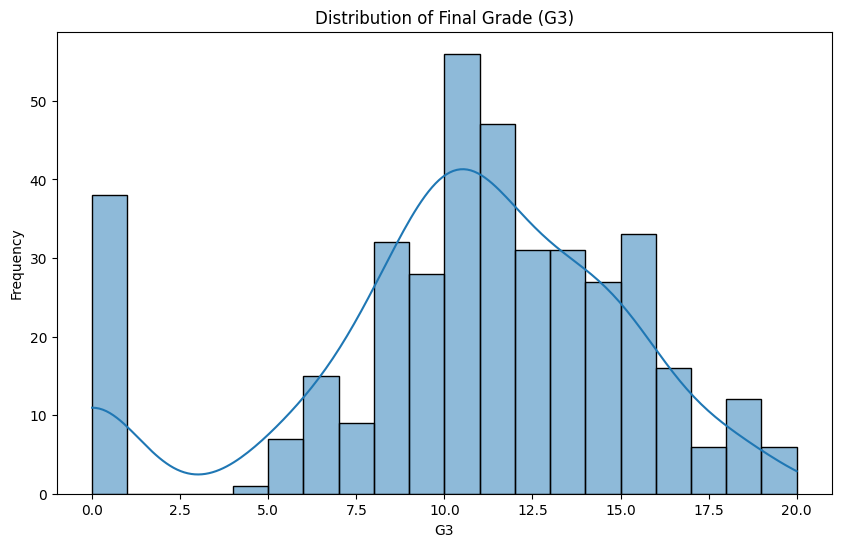

In [12]:
# Visualize the distribution of the target variable 'G3'
plt.figure(figsize=(10, 6))
sns.histplot(df['G3'], bins=20, kde=True)
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Select numeric columns for correlation matrix
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
                'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

In [15]:
# Create a DataFrame containing only numeric columns
df_numeric = df[numeric_cols]

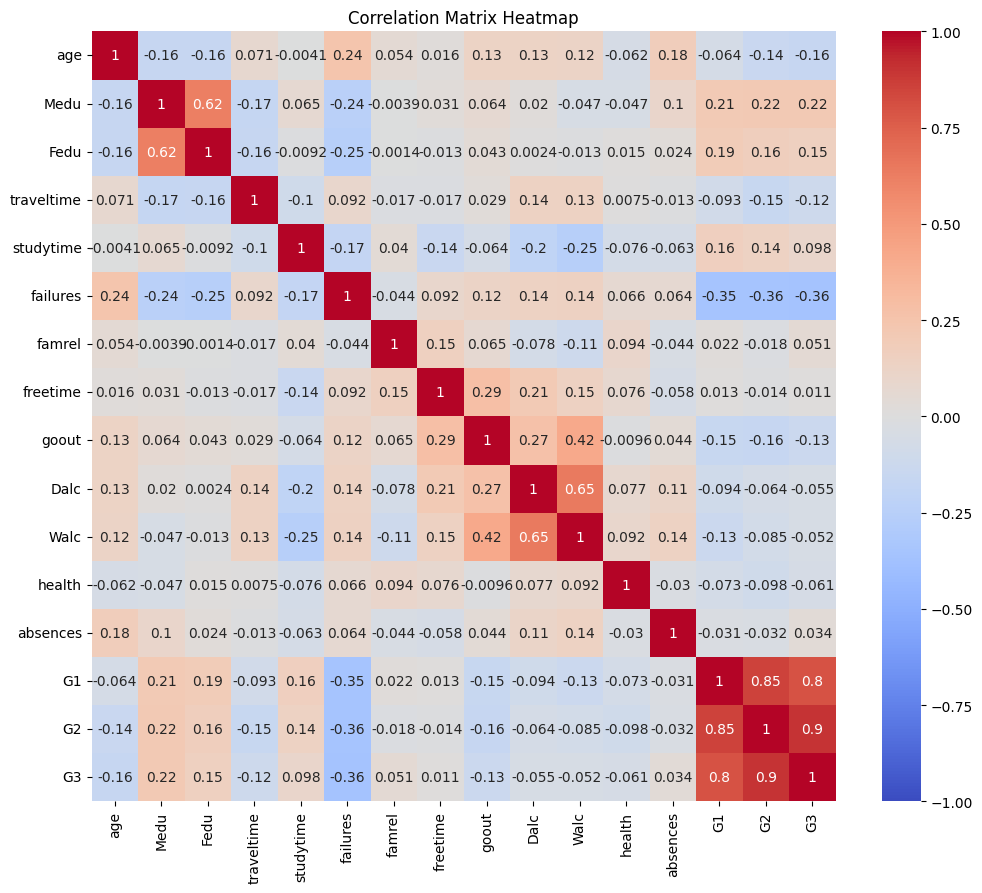

In [16]:
#Correlation matrix heatmap for numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [17]:
# Data normalization #normalization
# Select relevant features for prediction
X = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
        'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']]
y = df['G3']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [19]:
# Standardization using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Regression techniques #regression
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)

In [21]:
# Support Vector Regression (SVR)
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)
svr_pred = svr.predict(X_test_scaled)

In [22]:
#Random Forest Regression
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)

In [23]:
# Evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [24]:
lr_mse, lr_r2 = evaluate_model(y_test, lr_pred)
svr_mse, svr_r2 = evaluate_model(y_test, svr_pred)
rf_mse, rf_r2 = evaluate_model(y_test, rf_pred)

In [26]:
print(f"Linear Regression - MSE: {lr_mse:.2f}, R-squared: {lr_r2:.2f}")
print(f"SVR - MSE: {svr_mse:.2f}, R-squared: {svr_r2:.2f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R-squared: {rf_r2:.2f}")

Linear Regression - MSE: 4.50, R-squared: 0.78
SVR - MSE: 4.27, R-squared: 0.79
Random Forest - MSE: 2.96, R-squared: 0.86


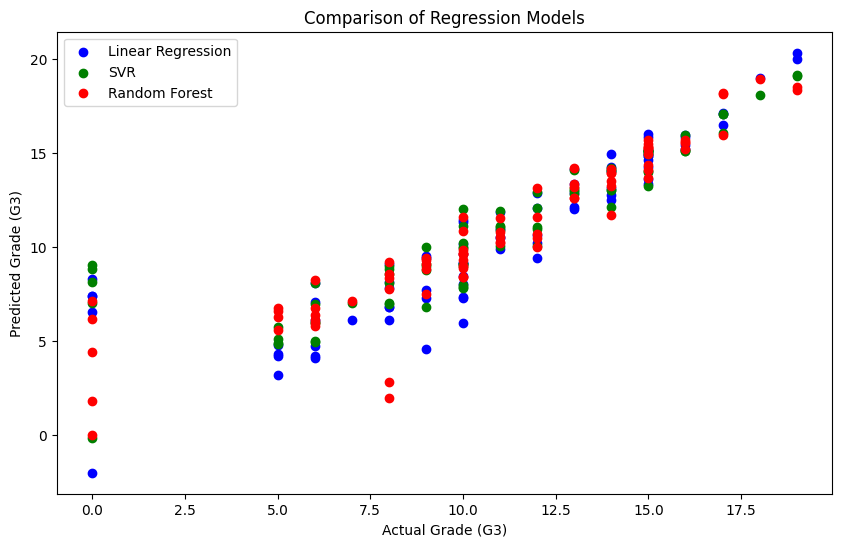

In [27]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, color='blue', label='Linear Regression')
plt.scatter(y_test, svr_pred, color='green', label='SVR')
plt.scatter(y_test, rf_pred, color='red', label='Random Forest')
plt.xlabel('Actual Grade (G3)')
plt.ylabel('Predicted Grade (G3)')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()